### Student Information
Name: 許人中

Student ID: M133010052

GitHub ID: JamesHsu1221

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

### Dataset Summary

+ The dataset is a collection of  Youtube Comments and it was captured using the YouTube Data API. 
+ The data set consists of 1500 nostalgic and non-nostalgic comments in English.

### Languages

The language of the data is English.

### Citation
If you find this dataset usefull for your study, please cite the paper as followed:

```bibtex
@article{postalcioglu2020comparison,
  title={Comparison of Neural Network Models for Nostalgic Sentiment Analysis of YouTube Comments},
  author={Postalcioglu, Seda and Aktas, Senem},
  journal={Hittite Journal of Science and Engineering},
  volume={7},
  number={3},
  pages={215--221},
  year={2020},
  publisher={Hitit University}
}

---

## 2. Data Preparation
We can load this csv file online.

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

or we can download it and load it in our folder.

In [3]:
import pandas as pd

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

Try to display some information about dataframe.

In [4]:
print(len(df))

1500


In [5]:
df [0:5]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [6]:
df['comment'][0:5]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
Name: comment, dtype: object

In [7]:
df.sentiment[0:5]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
Name: sentiment, dtype: object

Branch to new line according to '.'

In [8]:
print("\n".join(df.comment[0].split(".")))

He was a singer with a golden voice that I love to hear all the time
 I was his great fan at the age of 16years in those days and still now
 Although we have many singers now, but, I can vouch for Jim Reeves all the time
 You feel relaxed, emotional and loving
 Thank you Lord for his life



use 'for' function to print the comment.

In [9]:
for t in df['comment'][:3]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


---

## 3. Data Transformation

### 3.1 Adding Columns

create new column `sentiment_number` to save `sentiment` in number.

In [10]:
for t in range(len(df)):
    if df['sentiment'][t] == 'not nostalgia':
        df.at[t,'sentiment_number'] = 0
    elif df['sentiment'][t] == 'nostalgia':
        df.at[t,'sentiment_number'] = 1
df['sentiment_number'] = df['sentiment_number'].astype(int)

print(f"How many columns we have : {len(df.columns)}") # checking how many columns we have
df[0:3]

How many columns we have : 3


,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1


### 3.2 Familiarizing yourself with the Data

query the last 10 records

In [11]:
# a simple query
df[-10:][["comment","sentiment"]]

,comment,sentiment
1490,"He really isn't my cup of tea, but some of his...",not nostalgia
1491,real music...how i miss those days...brings ba...,nostalgia
1492,i used to cry over this song cause i had a boy...,nostalgia
1493,"He really has that ""love you like a brother"" l...",not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,not nostalgia
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia
1499,This is the first CD I bought after my marriag...,nostalgia


In [12]:
# using loc (by label)
df.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [13]:
# using iloc (by position)
df.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [14]:
# using at (specify which one you want)
df.at[10,'comment']

'ill bet if they begin to play this song on the radio to a new generation it could be still a hit ,,that goes for anytime in the future'

In [15]:
df[::10][:10]

,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,0
10,not nostalgia,ill bet if they begin to play this song on the...,0
20,nostalgia,So many happy memories of the Jim reeves album...,1
30,nostalgia,remembering the good old days,1
40,nostalgia,My late mom's favorite when I was a young boy....,1
50,nostalgia,"If I remember correctly, this song came out af...",1
60,nostalgia,I have listened to Distant Drums since my tee...,1
70,nostalgia,Reminds me of my parents... in happy times..,1
80,not nostalgia,"Uhh man, music like this was alive back in the...",0
90,nostalgia,I remember listening to this classic song on K...,1


In [16]:
df.loc[lambda f:f.sentiment =='nostalgia'].iloc[0:10:2]

,sentiment,comment,sentiment_number
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
11,nostalgia,this song came out my senior year in high scho...,1
13,nostalgia,I am 47 and grew up on songs of this type. I ...,1


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

check missing values

In [17]:
df.isnull()

,sentiment,comment,sentiment_number
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


use function to know how many missing value in every column.

In [18]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


adding missing value to original dataframe.

In [19]:
# create missing value and combine with original dataframe
missing_value = [{'comment': '(missing value test)',
              }]

df_missing = pd.concat([df, pd.DataFrame(missing_value)], ignore_index=True)

len(df_missing)

1501

In [20]:
import helpers.data_mining_helpers as dmh

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,1


delete the row if the dataframe have missing value.

In [21]:
df_missing.dropna(inplace=True)

print(len(df_missing))

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

1500


,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data

Detect how many rows are duplicate.

In [22]:
sum(df.duplicated())

1

Or we can only choose one column we want to know.

In [23]:
sum(df.duplicated('sentiment'))

1498

In the first cell, we know we have totally duplicated rows.  
If we want to know which row is duplicated, we can search like this.

In [24]:
print(df[df.duplicated(keep=False)])

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_number  
62                 0  
78                 0  


We can delete the duplicates row bu using `drop_duplicated`.

In [25]:
df_delete_duplicated = df.drop_duplicates(keep='first', inplace=False) # keep the first comments and original dataframe

print(f"In the origianl dataframe, how many row's we have : {len(df)}")
print(f"After we delete the duplicated row, how many row's we have : {len(df_delete_duplicated)}")
print(f"After we delete the duplicated row, how many rows are duplicated : {sum(df_delete_duplicated.duplicated())}")

In the origianl dataframe, how many row's we have : 1500
After we delete the duplicated row, how many row's we have : 1499
After we delete the duplicated row, how many rows are duplicated : 0


We use `keep='first'`, because we want keep this comment and only delete the duplicated one.  
So only ruduce one row but not two rows.

---

## 5.  Data Preprocessing

### 5.1 Sampling

In [26]:
df_sample = df.sample(n=1000) #random state

len(df_sample)


1000

In [27]:
df_sample[0:20]

,sentiment,comment,sentiment_number
1404,nostalgia,I remember listening this track down at the sk...,1
596,not nostalgia,My 5 year old daughter and I dance to this son...,0
32,nostalgia,I remember my Mom listening to Jim over and ov...,1
1008,nostalgia,This beautiful song brings back all my childho...,1
939,nostalgia,Beautiful song. Takes me back to happy days an...,1
1485,not nostalgia,Would not every girl want a guy with big hair ...,0
187,not nostalgia,"He was called the King, but still under-rated....",0
443,not nostalgia,its not Lonely is a man without love its as Lo...,0
863,not nostalgia,Everybody's got an excuse when they're a nonce...,0
597,not nostalgia,Leave it up to me to leave my volume on the hi...,0


Use bar plot to see the data distribution. (We are going to use `matplotlib` python library.)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution for original dataframe'}, xlabel='sentiment'>

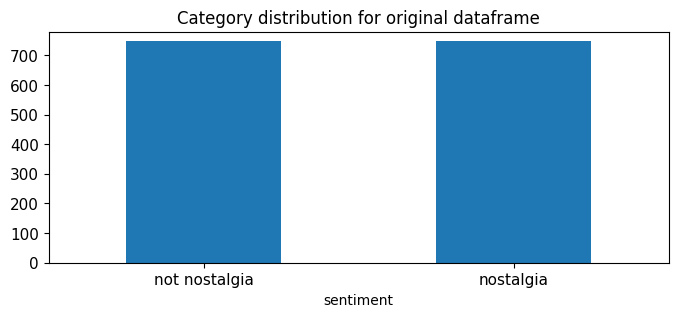

In [29]:
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution for original dataframe',
                                ylim = [0,  max(df.sentiment.value_counts()+30)],        
                                rot = 0, fontsize = 11, figsize = (8,3))

sentiment
nostalgia        508
not nostalgia    492
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution for sample dataframe'}, xlabel='sentiment'>

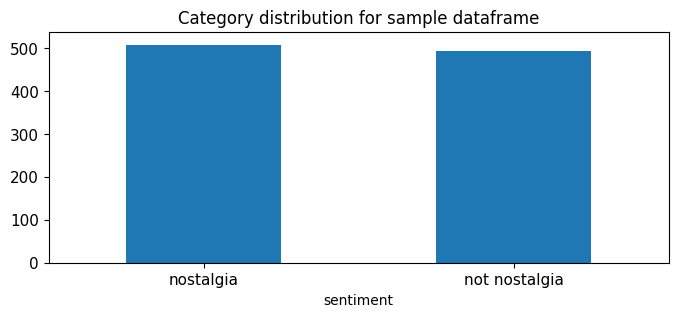

In [30]:
print(df_sample.sentiment.value_counts())

# plot barchart for X
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution for sample dataframe',
                                ylim = [0,  max(df_sample.sentiment.value_counts()+30)],        
                                rot = 0, fontsize = 11, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

In [31]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Combine two bar plot to compare about number of `df` and `df_sample`.

Text(0.5, 0, '')

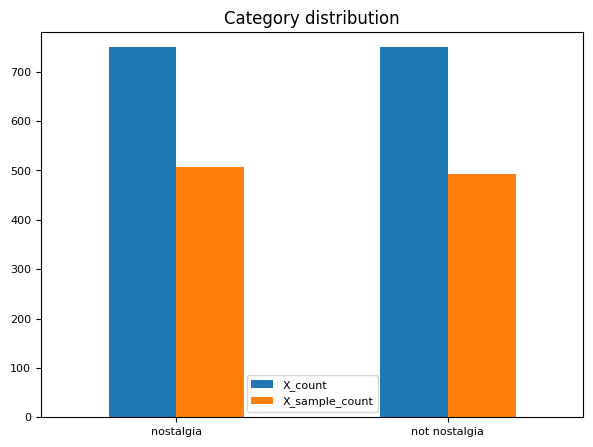

In [32]:
df_count = df.sentiment.value_counts()
df_sample_count = df_sample.sentiment.value_counts()

combine = pd.DataFrame({'X_count':df_count, 'X_sample_count':df_sample_count})
combine.plot(kind='bar', 
        title='Category distribution',
        ylim=[0, max(combine.max())+30], 
        width=0.5,
        rot=0, fontsize=8, figsize=(7,5))
plt.legend(prop={'size': 8})
plt.xlabel('')

### 5.2 Feature Creation

As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to.

In [33]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

df[0:5]

,sentiment,comment,sentiment_number,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


Now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `comment` field.  

Let's see what's in `unigrams`.

In [34]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

Now, we are going to generate a **document-term matrix**  from the original dataset.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

We can see what's the word in the index.

In [36]:
print(count_vect.get_feature_names_out()[1598])
print(count_vect.get_feature_names_out()[3570])
print(count_vect.get_feature_names_out()[2973])
print(count_vect.get_feature_names_out()[3650])

he
was
singer
with


Use `analyzer` to filt some common words.

In [37]:
analyze = count_vect.build_analyzer()

print(f"Before analyze : {df.loc[0,'unigrams']}")
print(f"After  analyze : {analyze(df.loc[0,'comment'])}")

Before analyze : ['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'now', ',', 'but', ',', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time', '.', 'You', 'feel', 'relaxed', ',', 'emotional', 'and', 'loving', '.', 'Thank', 'you', 'Lord', 'for', 'his', 'life', '.']
After  analyze : ['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


Now let us look at the term-document matrix we built above.

In [38]:
df_counts.shape

(1500, 3730)

In [39]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array.

In [40]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

`Data visualize` is make us to know data distuibution, so let's display word frequency with **heatmap**.

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib.

In [41]:
# first twenty features only
plot_x = [str(i) for i in count_vect.get_feature_names_out()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]

# df_counts[how many documents, how many terms]
plot_z = df_counts[0:30, 0:30].toarray()

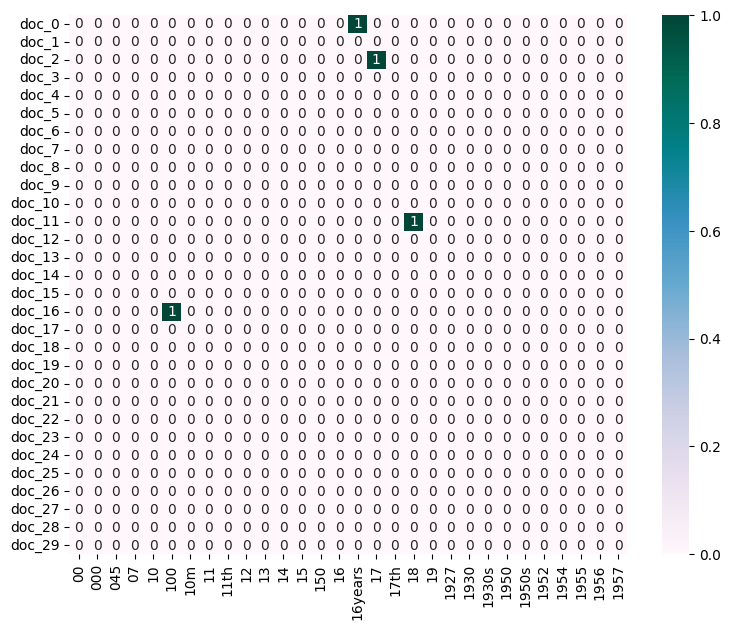

In [42]:
import seaborn as sns

df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_heatmap,
                 cmap="PuBuGn",
                 vmin=0, vmax=1, annot=True)

Search high frequency words in documents 0~30 and show on heatmap.

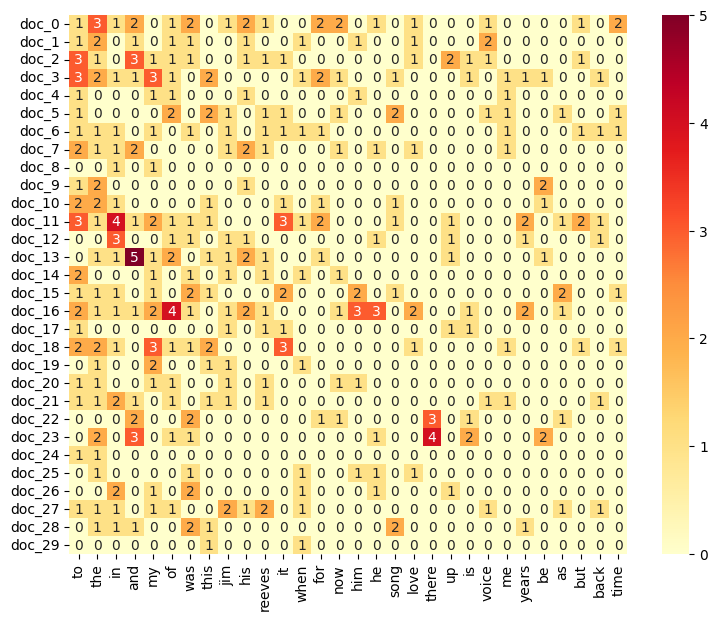

In [43]:
import numpy as np

hw_plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]] #doc 0~29
word_freq = np.array(df_counts[0:30, :].sum(axis=0)).flatten() #Find the vocabulary appear frequency in doc 0~29.
top_30_indices = np.argpartition(word_freq, -30)[-30:] #find the top 30 vocabulary's indice
high_to_low = top_30_indices[::-1]
hw_plot_z = df_counts[0:30, high_to_low].toarray() #make the form
hw_plot_x = count_vect.get_feature_names_out()[high_to_low] #change indice in the text 
Q11_df = pd.DataFrame(hw_plot_z, columns = hw_plot_x, index = hw_plot_y) #combine all the info
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(Q11_df,
                 cmap="YlOrRd",
                 vmin=0, vmax=np.max(hw_plot_z), annot=True)

### 5.4 Attribute Transformation / Aggregation

To count the total term frequency, we can use `for` to implement.

In [44]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

or we can use `np.asarray` to implement.  

In [45]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

Although both code implement the same function, but we can observe that using `np.array` is faster than using `for`. This is because it use a concept about **vectorized operations** in NumPy.  
These operations allow the computation to be applied to entire arrays at once, rather than iterating through individual elements.

In [46]:
print (term_frequencies)

[1 2 1 ... 1 1 1]


Let's see the amount of 0~150 term. (using `plotly` to make us easy to observe.)

In [47]:
import plotly.express as px

g = px.bar(x=count_vect.get_feature_names_out()[:150], 
            y=term_frequencies[:150])
g.show()

See the top 150 words by quantity.

In [48]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
g = px.bar(x=count_vect.get_feature_names_out()[top_150_indices], 
            y=term_frequencies[top_150_indices])
g.show()

Using **long tail graph** to make it easier to visualize.

In [49]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
high_to_low_indices = top_150_indices[::-1]
top_150_bar = px.bar(x = count_vect.get_feature_names_out()[high_to_low_indices], 
            y = term_frequencies[high_to_low_indices],
            color = term_frequencies[high_to_low_indices], color_continuous_scale = 'Portland')
top_150_bar.update_layout(xaxis_title="term name", xaxis_tickangle=-90, yaxis_title=" amount ")

Use `log` to make the gap look less big.

In [50]:
import math
term_frequencies_log = np.array([math.log(i) for i in term_frequencies])

In [51]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
high_to_low_indices = top_150_indices[::-1]
top_150_bar = px.bar(x = count_vect.get_feature_names_out()[high_to_low_indices], 
            y = term_frequencies_log[high_to_low_indices],
            color = term_frequencies_log[high_to_low_indices], color_continuous_scale = 'Portland')
top_150_bar.update_layout(xaxis_title="term name", xaxis_tickangle=-90, yaxis_title=" amount ")

###  Finding frequent patterns

In our scenario, what we need is to mine patterns that can be representative to **each category**, in this way we will be able to differentiate each group of data more easily

modify our document-term matrix to be able to work for each category.

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [53]:
category_number = 0 #You can change it from 0 or 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Use bar plot to see Term Frequency Distribution

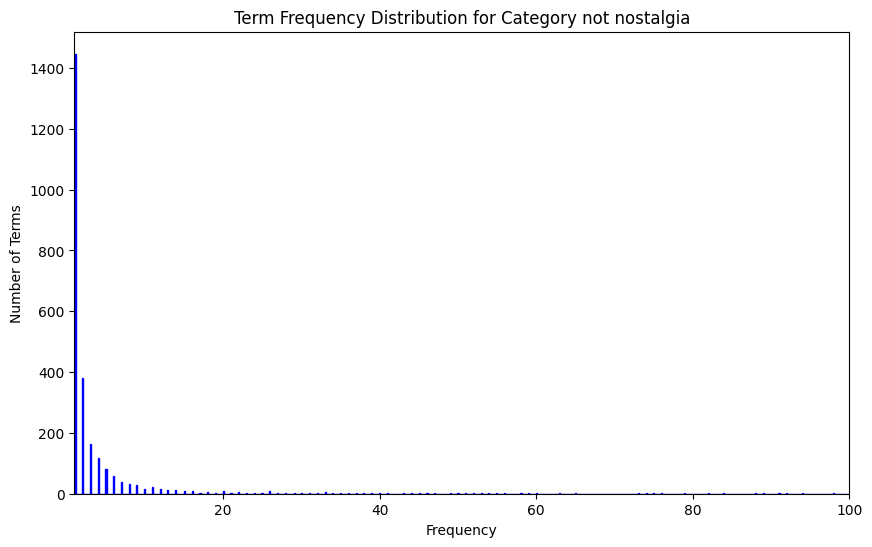

In [54]:
 # Sum over all documents to get total frequency for each word
category_number = 0 #You can change it from 0 or 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='blue')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

From this graph, we can see that most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often. When we're trying to find patterns in text data, we focus on combinations of words that are most helpful for classifying the documents. However, very rare words or extremely common words (like stopwords: 'the,' 'in,' 'a,' 'of,' etc.) don’t usually give us much useful information. To improve our results, we can filter out these words.

Try to remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

**Top 5%**

In [55]:
category_number = 0 #You can change it from 0 or 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'not', 'on', 'be', 'can', 'voice', 'me', 'just', 'beautiful', 'songs', 'as', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'are', 'at', 'always', 'good', 'no', 'never', 'now', 'know', 'much', 'about', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'would', 'thank', 'think', 'still', 'only', 'don', 'how', 'has', 'very', 'am', 'there', 'out', 'these', 'him', 'could', 'an', 'up', 'old', 'listen', 'do', 'hear', 'singer', 'many', 'had', 'here', 'such', 'version', 'too', 'today', 'been', 'heard', 'get', 'most', 'world', 'people', 'your', 'man', 'some', 'video', 'sing', 'listening', 'years', 'real', 'than', 'were', 'nice', 'heart', 'singing', 'life', 'their', 'better', 'day', 'its', 'then', 'come', 'sad', 'god', 

In [56]:
# We can see words total count.
print(sorted_counts)

#
print(f"Filtered terms: {filtered_words}")

#Total quantity of 'the'.
print(f"amount of 'the': {filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)}")

[708 453 451 ...   1   1   1]
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'not', 'on', 'be', 'can', 'voice', 'me', 'just', 'beautiful', 'songs', 'as', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'are', 'at', 'always', 'good', 'no', 'never', 'now', 'know', 'much', 'about', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'would', 'thank', 'think', 'still', 'only', 'don', 'how', 'has', 'very', 'am', 'there', 'out', 'these', 'him', 'could', 'an', 'up', 'old', 'listen', 'do', 'hear', 'singer', 'many', 'had', 'here', 'such', 'version', 'too', 'today', 'been', 'heard', 'get', 'most', 'world', 'people', 'your', 'man', 'some', 'video', 'sing', 'listening', 'years', 'real', 'than', 'were', 'nice', 'heart', 'singing', 'life', 'their', 'better', 'day', 'its', 'then', 'come', 'sad', 'god', 'why', 'did', 'those', 'w

**Bottom 1%**

In [57]:
category_number = 0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['17th', '16years', '1981', '1973', '1970', '1969', '1965', '1963', '1960s', '12', '10m', 'zulus', 'youngsters', 'spewing', 'spectorish', 'speaks', 'sees', 'section', '2010', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn']


Show all in one code

In [58]:
category_number = 0 #You can change it from 0 or 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
17th          1
16years       1
1981          1
1973          1
1970          1
1969          1
1965          1
1963          1
1960s         1
12            1
10m           1
zulus         1
youngsters    1
spewing       1
spectorish    1
speaks        1
sees          1
section       1
2010          1
xd            1
wwii          1
wuv           1
writers       1
writer        1
wrenching     1
wouldn        1
dtype: int64
Top 5.0% words: 
got         23
first       23
wish        24
amazing     24
or          25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
p

,00,000,045,10,100,11,14,15,150,16,...,yet,young,younger,youngest,yourself,youth,youtube,yrs,yuo,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with.  

We will generate a CSV file for each category to create this database.

In [59]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace space with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Show the information about transactional databases.

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


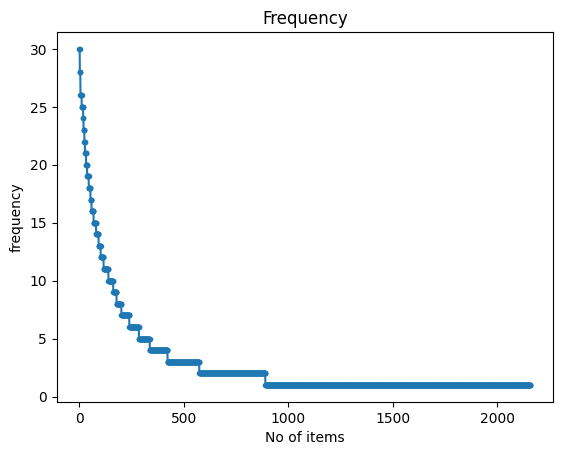

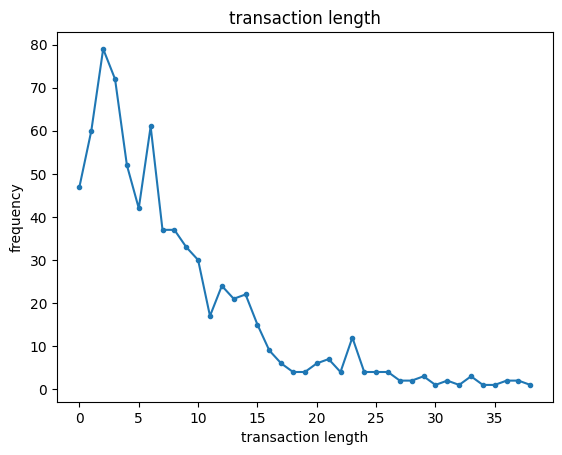

In [60]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 747
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.392235609103079
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.938560371491883
Variance in Transaction Sizes : 35.31377341358284
Sparsity : 0.9965689960715033


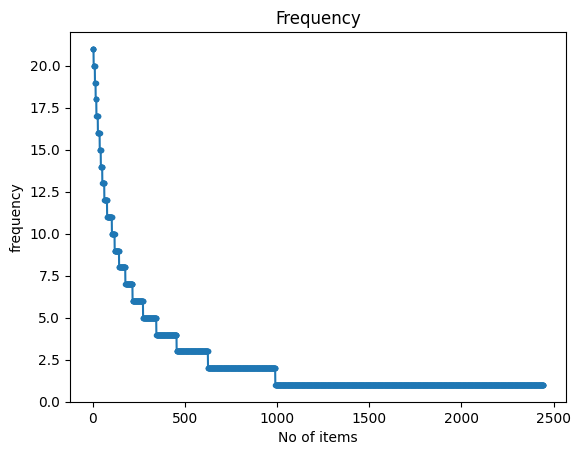

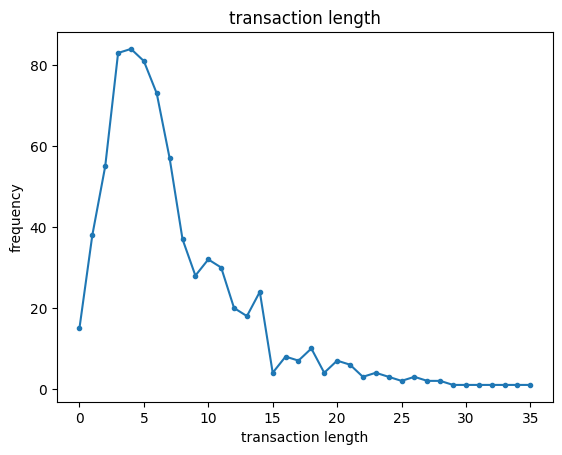

In [61]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Using `FPGrowth` to mining our data.  

By setting minSup at 9, we focus on combinations of items that show up in these smaller, more common transactions. This level is low enough to include items that show up more than just a few times, but it's high enough to leave out patterns that don't appear often enough to be meaningful. This helps us keep our results clear and makes sure the patterns we find are useful and represent what's really happening in the dataset.

In [62]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.010007858276367188


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


In [63]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.006947994232177734


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


Focusing on **unique patterns** help us **significantly improve the classification process**.

Identify and filt duplicated patterns that appear in different categories from multiple datasets and save the unique patterns within each category.

In [64]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df_1 in dfs:
    for pattern in df_1['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df_1 in dfs:
    filtered_df = df_1[df_1['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


The next step is to integrate these now category-specific patterns into our data.  
Specifically, we will check each document for the presence of each pattern.

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Pratice to using `TOP k` to mining our data. (only demo on **nostalgia** to see the rusult)

In [66]:
from PAMI.frequentPattern.topk import FAE as FAE_topk

fae_topk = FAE_topk.FAE(iFile='td_freq_db_nostalgia.csv', k = 500)
fae_topk.mine()
patterns_fae_topk = fae_topk.getPatternsAsDataFrame()
    
print("\nTop-K, k = 500 :")
print('Total No of patterns: ' + str(len(patterns_fae_topk)))
print('Runtime: ' + str(fae_topk.getRuntime()))
print(patterns_fae_topk)

 TopK frequent patterns were successfully generated using FAE algorithm.

Top-K, k = 500 :
Total No of patterns: 500
Runtime: 0.08808016777038574
     Patterns  Support
0       takes       30
1    favorite       30
2        ever       28
3       would       28
4          go       28
..        ...      ...
495    reason        3
496  whatever        3
497   artists        3
498    august        3
499    roller        3

[500 rows x 2 columns]


Pratice to using `MaxGrowth` to mining our data. (only demo on **nostalgia** to see the rusult)

In [67]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as MFPG

MaxFPG = MFPG.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup = 9)
MaxFPG.mine()
patterns_MaxFPG = MaxFPG.getPatternsAsDataFrame()
    
print(f"\nMaxFPGrowth, minSup = 9 :")
print('Total No of patterns: ' + str(len(patterns_MaxFPG)))
print('Runtime: ' + str(MaxFPG.getRuntime()))
print(patterns_MaxFPG)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

MaxFPGrowth, minSup = 9 :
Total No of patterns: 176
Runtime: 0.015017986297607422
      Patterns  Support
0       karen         9
1       right         9
2       place         9
3     records         9
4         yes         9
..         ...      ...
171        go        28
172     would        28
173      ever        28
174  favorite        30
175     takes        30

[176 rows x 2 columns]


### 5.5 Dimensionality Reduction

Dimensionality reduction is a powerful technique for tackling the "curse of dimensionality," which commonly arises due to data sparsity. This technique is not only beneficial for visualizing data more effectively but also simplifies the data by reducing the number of dimensions without losing significant information.

We are going to make use of `Principal Component Analysis`, `t-SNE`, `UMAP` to efficeintly reduce the dimensions of our data.  

**Input:** Raw term-vector matrix

**Output:** Projections 

Let's try to create a 2D plot after applying these algorithms to our dataframes and see what comes out.

In [68]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

print (f"Shape of Term-Document Matrix after PCA : {df_pca_tdm.shape}")
print (f"Shape of Term-Document Matrix after t-SNE : {df_tsne_tdm.shape}")
print (f"Shape of Term-Document Matrix after UMAP : {df_umap_tdm.shape}")

Shape of Term-Document Matrix after PCA : (1500, 2)
Shape of Term-Document Matrix after t-SNE : (1500, 2)
Shape of Term-Document Matrix after UMAP : (1500, 2)


Make data visualization.

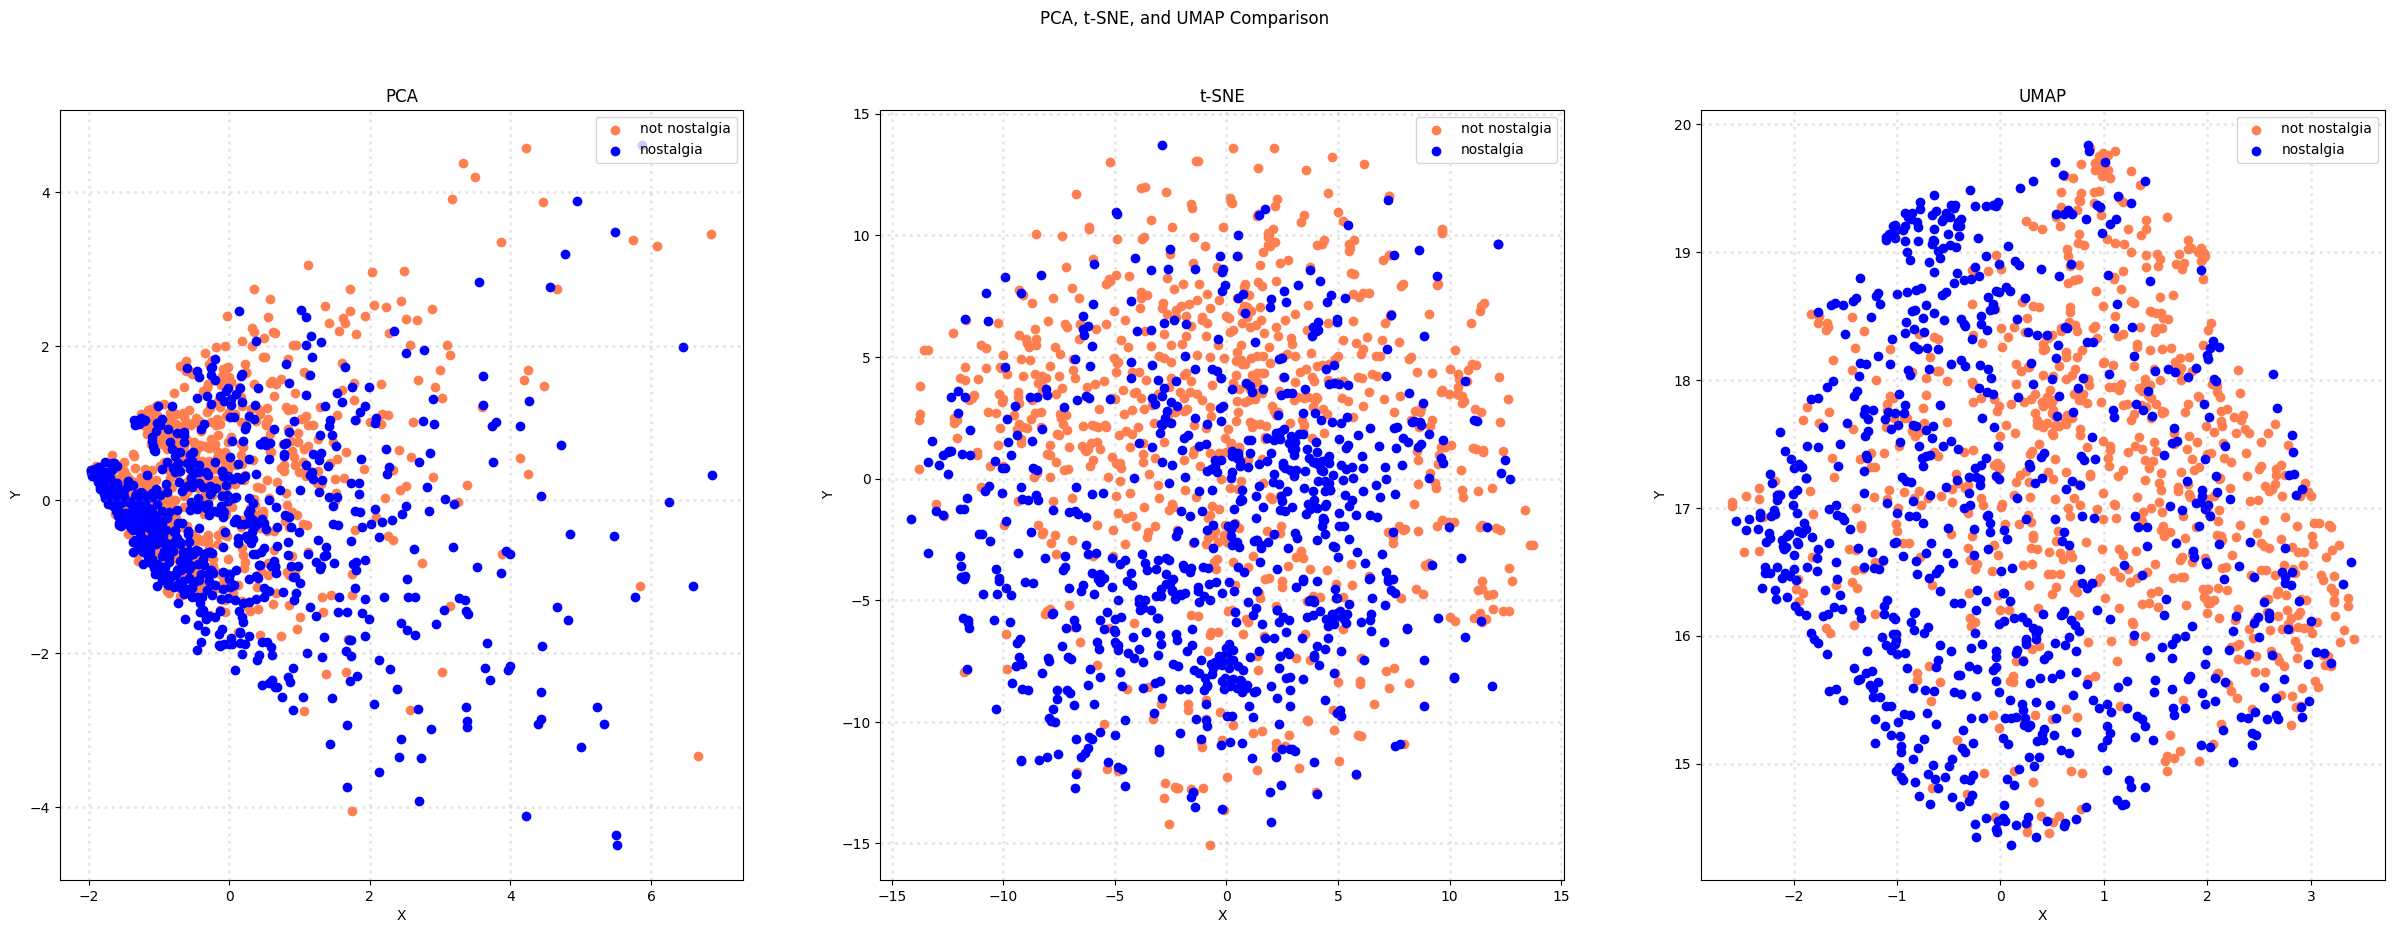

In [69]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

Now let's try in tandem with our pattern augmented data:

In [70]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

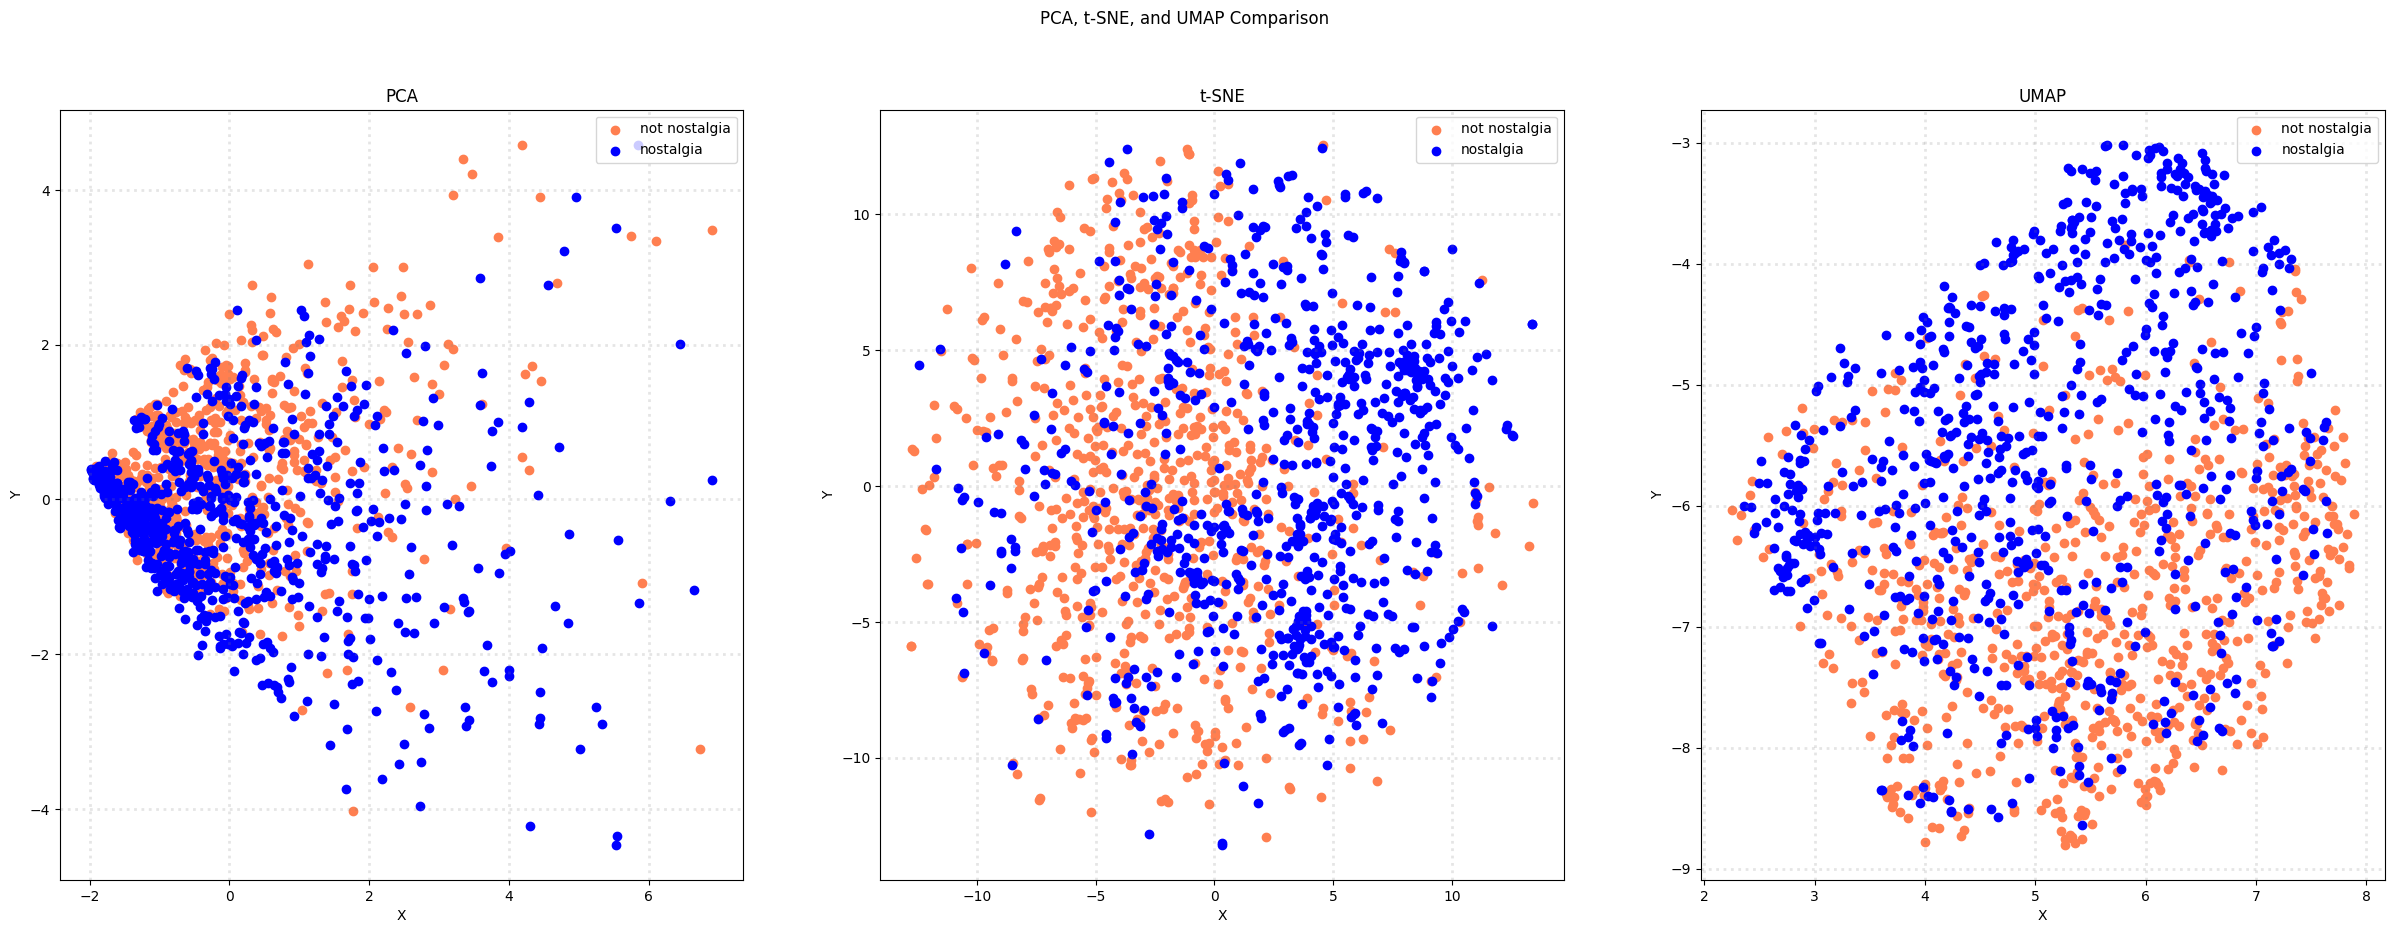

In [71]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

plt.show()

Maybe reducing to a two-dimensional plane loses too many features,so let's try to reduce the dimension to 3, and plot the result use 3-D plot to see what different. (use PCA to observe)

In [72]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df_PCA_3D = PCA(n_components = 3).fit_transform(augmented_df.values)

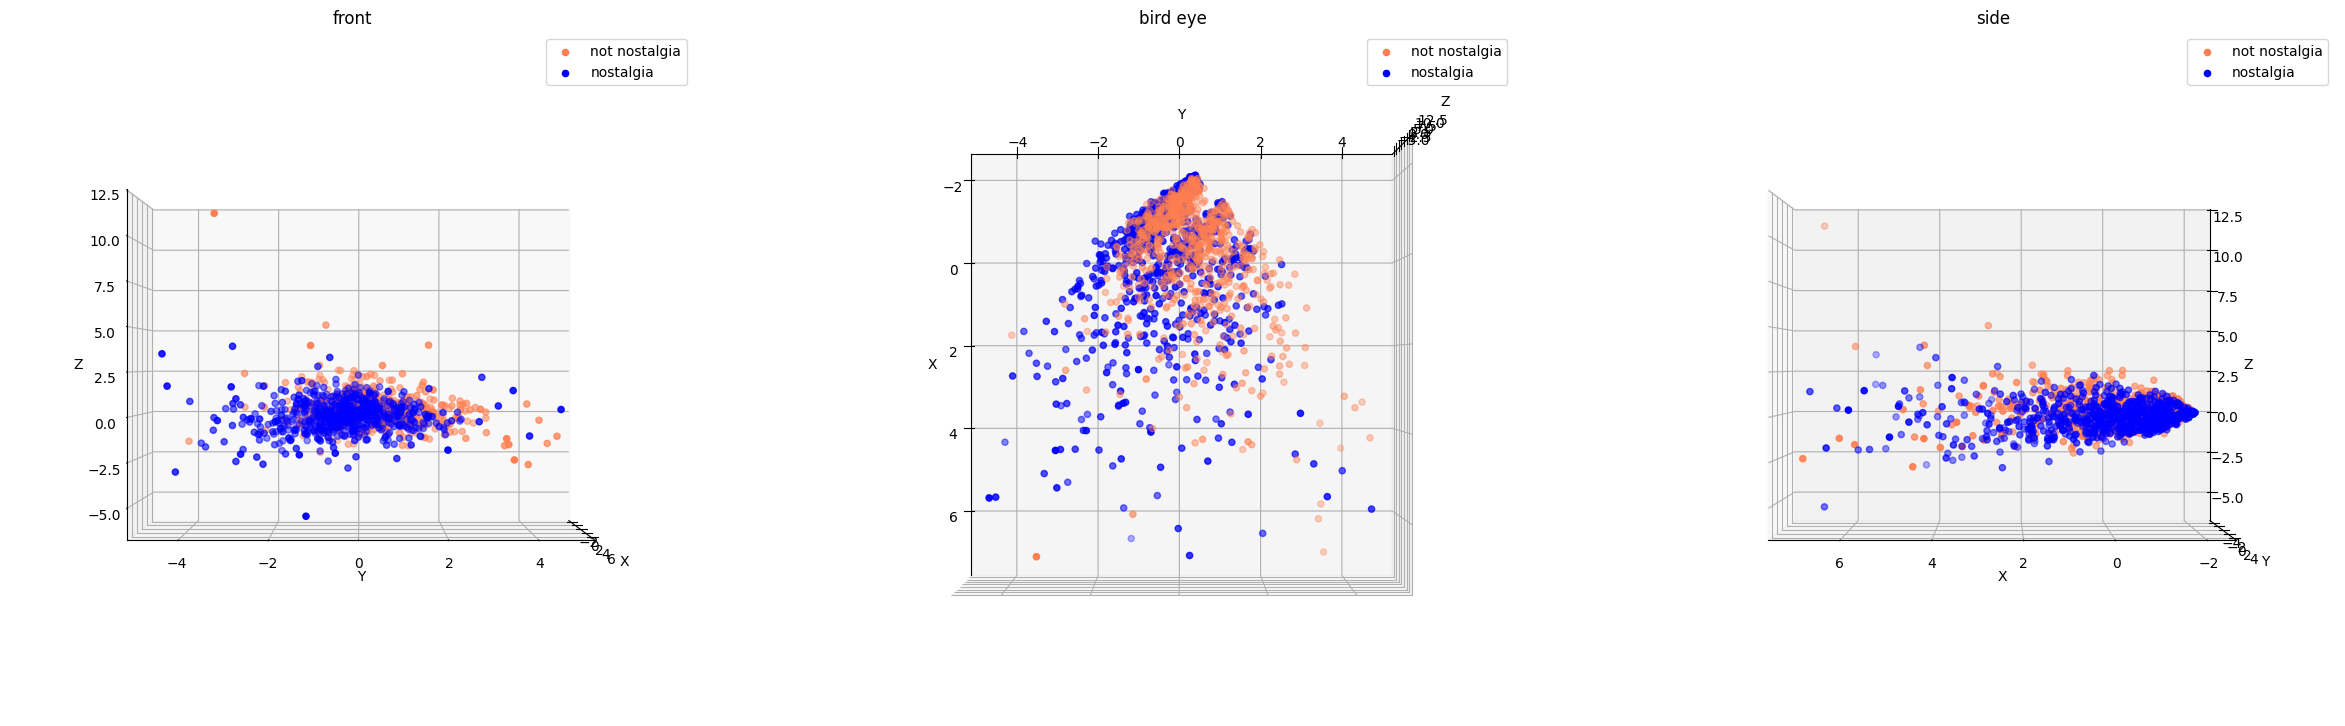

In [73]:
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection': '3d'})

def plot_3D(ax, yaw ,rotate, title):
    for c, category in zip(col, categories):
        xs = df_PCA_3D[df['sentiment'] == category].T[0]
        ys = df_PCA_3D[df['sentiment'] == category].T[1]
        zs = df_PCA_3D[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(yaw, rotate)

plot_3D(axes[0], 0, 0, 'front')
plot_3D(axes[1], 90, 0, 'bird eye')
plot_3D(axes[2], 0, 90, 'side')
plt.show()

### 5.6 Discretization and Binarization

In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms.  

People from the machine learning community also refer to this transformation as one-hot encoding.

In [74]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment_number)

LabelBinarizer()

In [75]:
df['bin_sentiment_number'] = mlb.transform(df['sentiment_number']).tolist()
df[0:9]

,sentiment,comment,sentiment_number,unigrams,tokenized_comment,bin_sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{singers, You, age, the, vouch, with, Reeves, ...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{when, angel, of, Never, ever, still, to, a, f...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{my, job, age, the, leave, with, Reeves, at, s...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{my, 30, me"", the, leave, when, song, this, is...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{me, songs, my, mum, to, listening, him, playe...",[1]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{Every, heard, song, song., this, cry....becau...",[1]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{didn't, the, when, Time, 70's, then,, to, a, ...",[1]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{the, ., with, Reeves, nostalgic, TO, 71, HAVE...",[1]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{my, are, Wherever, heart, always, you, in}",[0]


Because there are only two categories originally, numbered 0 and 1.  
So the **bin_code** that comes out is the same.

---

## 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [76]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[30]['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[60]['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[90]['comment']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['remembering the good old days']
['I have listened to Distant  Drums since my teens many years ago Jims  a awesome  singer  love his songs God bless  Jim , from Inverness']
["I remember listening to this classic song on KOOL-FM 94.5 in Phoenix, AZ on Wolfman Jack's Graffiti Gold Weekend show back in the '70's. Great memories. Thanks for posting it."]


In [77]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


Use `Cosine Similarity` to see the similarity

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.076696
Cosine Similarity using count bw 2 and 3: 0.036564
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Win\AppData\Local\Temp\ipykernel_1892\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Win\AppData\Local\Temp\ipykernel_1892\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Win\AppData\Local\Temp\ipykernel_1892\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Win\AppData\Local\Temp\ipykernel_1892\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is de

---

## TF-IDF

**TF-IDF** (Term Frequency-Inverse Document Frequency) is a commonly used text processing technology used to measure the importance of words in a document set. It reduces the impact of common words and improves the influence of keywords by combining the frequency of a word in a single document (TF) and the inverse document frequency (IDF) of the word in all documents.

#### TF-IDF Formula

$$
TF(t) = \frac{\text{Number of word t appear in the document}}{\text{Total number of words in the document}}
$$
$$
IDF(t) = log(\frac{\text{Total number of documents}}{\text{Number of document containing word t}})
$$
$$
TF-IDF(t) = TF(t) * IDF(t)
$$

Generate `TF-IDF` features from the tokens of each text.  

`TfidfVectorizer` creates a dictionary from words provided to it and generates a matrix.matrix contains Term Frequency-Inverse Document Frequency (TFIDF) values between 0 and 1.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
df_tfidf = tfidf_vector.fit_transform(df.comment)

df_tfidf.shape

(1500, 3730)

In [80]:
print(tfidf_vector.get_feature_names_out())
print('\n')
print(df_tfidf[0:10, 0:20].toarray())

['00' '000' '045' ... 'yup' 'zealand' 'zulus']


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.2319573  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.14020647 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

We can see row 1 column 16 have value. It means this word appear in first comment.  
We can get the word and the comment to check it.

In [81]:
print(tfidf_vector.get_feature_names_out()[15])
print(df.comment[0])

16years
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


We can confirm that '16years' appear in the first comment.

Let's double check row 3 column 17

In [82]:
print(tfidf_vector.get_feature_names_out()[16])
print(df.comment[2])

17
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


'17' is really appear in third comment.

We also can use heat map to show the TF-IDF.

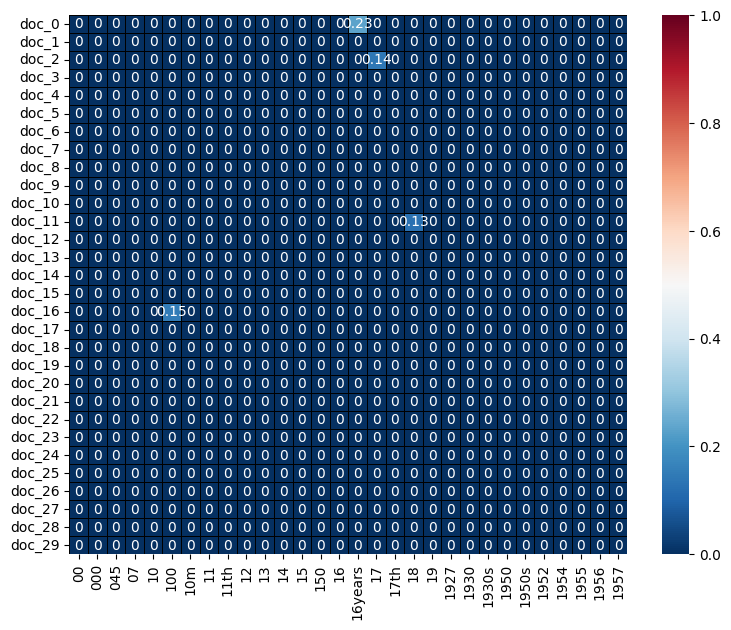

In [83]:
import seaborn as sns

tfidf_x = [str(i) for i in tfidf_vector.get_feature_names_out()[0:30]]
tfidf_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]

# df_counts[how many documents, how many terms]
tfidf_z = df_tfidf[0:30, 0:30].toarray()
df_heatmap = pd.DataFrame(tfidf_z, columns = tfidf_x, index = tfidf_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_heatmap,
                 cmap = "RdBu_r",linecolor = 'Black', linewidths=0.5,
                 vmin=0, vmax=1, annot=True)

---

## 7. Data Classification

Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology.

## Naive Bayes classifier

### use **Bernoulli naive Bayes** to implement classifier.

training on original term-document matrix. (70/30 split for the training and test set)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

tdm_X_train, tdm_X_test, tdm_y_train, tdm_y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

print(f"amount of training set : {len(tdm_X_train)}")
print(f"amount of testing  set : {len(tdm_X_test)}")

print (tdm_X_train[0:2])
print (tdm_y_train[0:10])

amount of training set : 1050
amount of testing  set : 450
     00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485   0    0    0   0   0    0    0   0     0   0  ...      0         0   
527   0    0    0   0   0    0    0   0     0   0  ...      0         0   

     youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485      0         0        0    0    0    0        0      0  
527      0         0        0    0    0    0        0      0  

[2 rows x 3730 columns]
485     not nostalgia
527     not nostalgia
199         nostalgia
889         nostalgia
844     not nostalgia
1068    not nostalgia
1205    not nostalgia
1054    not nostalgia
10      not nostalgia
147         nostalgia
Name: sentiment, dtype: object


In [85]:
nb_classifier = BernoulliNB()
nb_classifier.fit(tdm_X_train, tdm_y_train)

# Make predictions on the test set
tdm_ber_y_pred = nb_classifier.predict(tdm_X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(tdm_y_test, tdm_ber_y_pred))
print("\nClassification Report:\n", classification_report(tdm_y_test, tdm_ber_y_pred, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8443    0.9156    0.8785       225
not nostalgia     0.9078    0.8311    0.8677       225

     accuracy                         0.8733       450
    macro avg     0.8760    0.8733    0.8731       450
 weighted avg     0.8760    0.8733    0.8731       450



training on TF-IDF matrix. (70/30 split for the training and test set)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(df_tfidf, df['sentiment'], test_size=0.3, random_state=42)

print(f"amount of training set : {tfidf_X_train.shape[0]}")
print(f"amount of testing  set : {tfidf_X_test.shape[0]}")

print (tfidf_X_train[0:1])
print (tfidf_y_train[0:10])

amount of training set : 1050
amount of testing  set : 450
  (np.int32(0), np.int32(2028))	0.20806210725556068
  (np.int32(0), np.int32(3284))	0.12482209729468961
  (np.int32(0), np.int32(3304))	0.3076831222902726
  (np.int32(0), np.int32(410))	0.2462540287661677
  (np.int32(0), np.int32(2219))	0.3323080730891861
  (np.int32(0), np.int32(3300))	0.12550393452075082
  (np.int32(0), np.int32(3044))	0.14330715411295755
  (np.int32(0), np.int32(2245))	0.22188066068399404
  (np.int32(0), np.int32(822))	0.3134223750182873
  (np.int32(0), np.int32(1543))	0.4445730837437721
  (np.int32(0), np.int32(776))	0.5422111951518181
485     not nostalgia
527     not nostalgia
199         nostalgia
889         nostalgia
844     not nostalgia
1068    not nostalgia
1205    not nostalgia
1054    not nostalgia
10      not nostalgia
147         nostalgia
Name: sentiment, dtype: object


In [87]:
nb_classifier = BernoulliNB()
nb_classifier.fit(tfidf_X_train, tfidf_y_train)

# Make predictions on the test set
tfidf_ber_y_pred = nb_classifier.predict(tfidf_X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(tfidf_y_test, tfidf_ber_y_pred))
print("\nClassification Report:\n", classification_report(tfidf_y_test, tfidf_ber_y_pred, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8443    0.9156    0.8785       225
not nostalgia     0.9078    0.8311    0.8677       225

     accuracy                         0.8733       450
    macro avg     0.8760    0.8733    0.8731       450
 weighted avg     0.8760    0.8733    0.8731       450



Plot the `Confusion Matrix` to see the result.

(Text(0.5, 80.7222222222222, 'Predicted'),
 Text(1613.90404040404, 0.5, 'Actual'),
 Text(0.5, 1.0, 'BernoulliNB for TF-IDF matrix'))

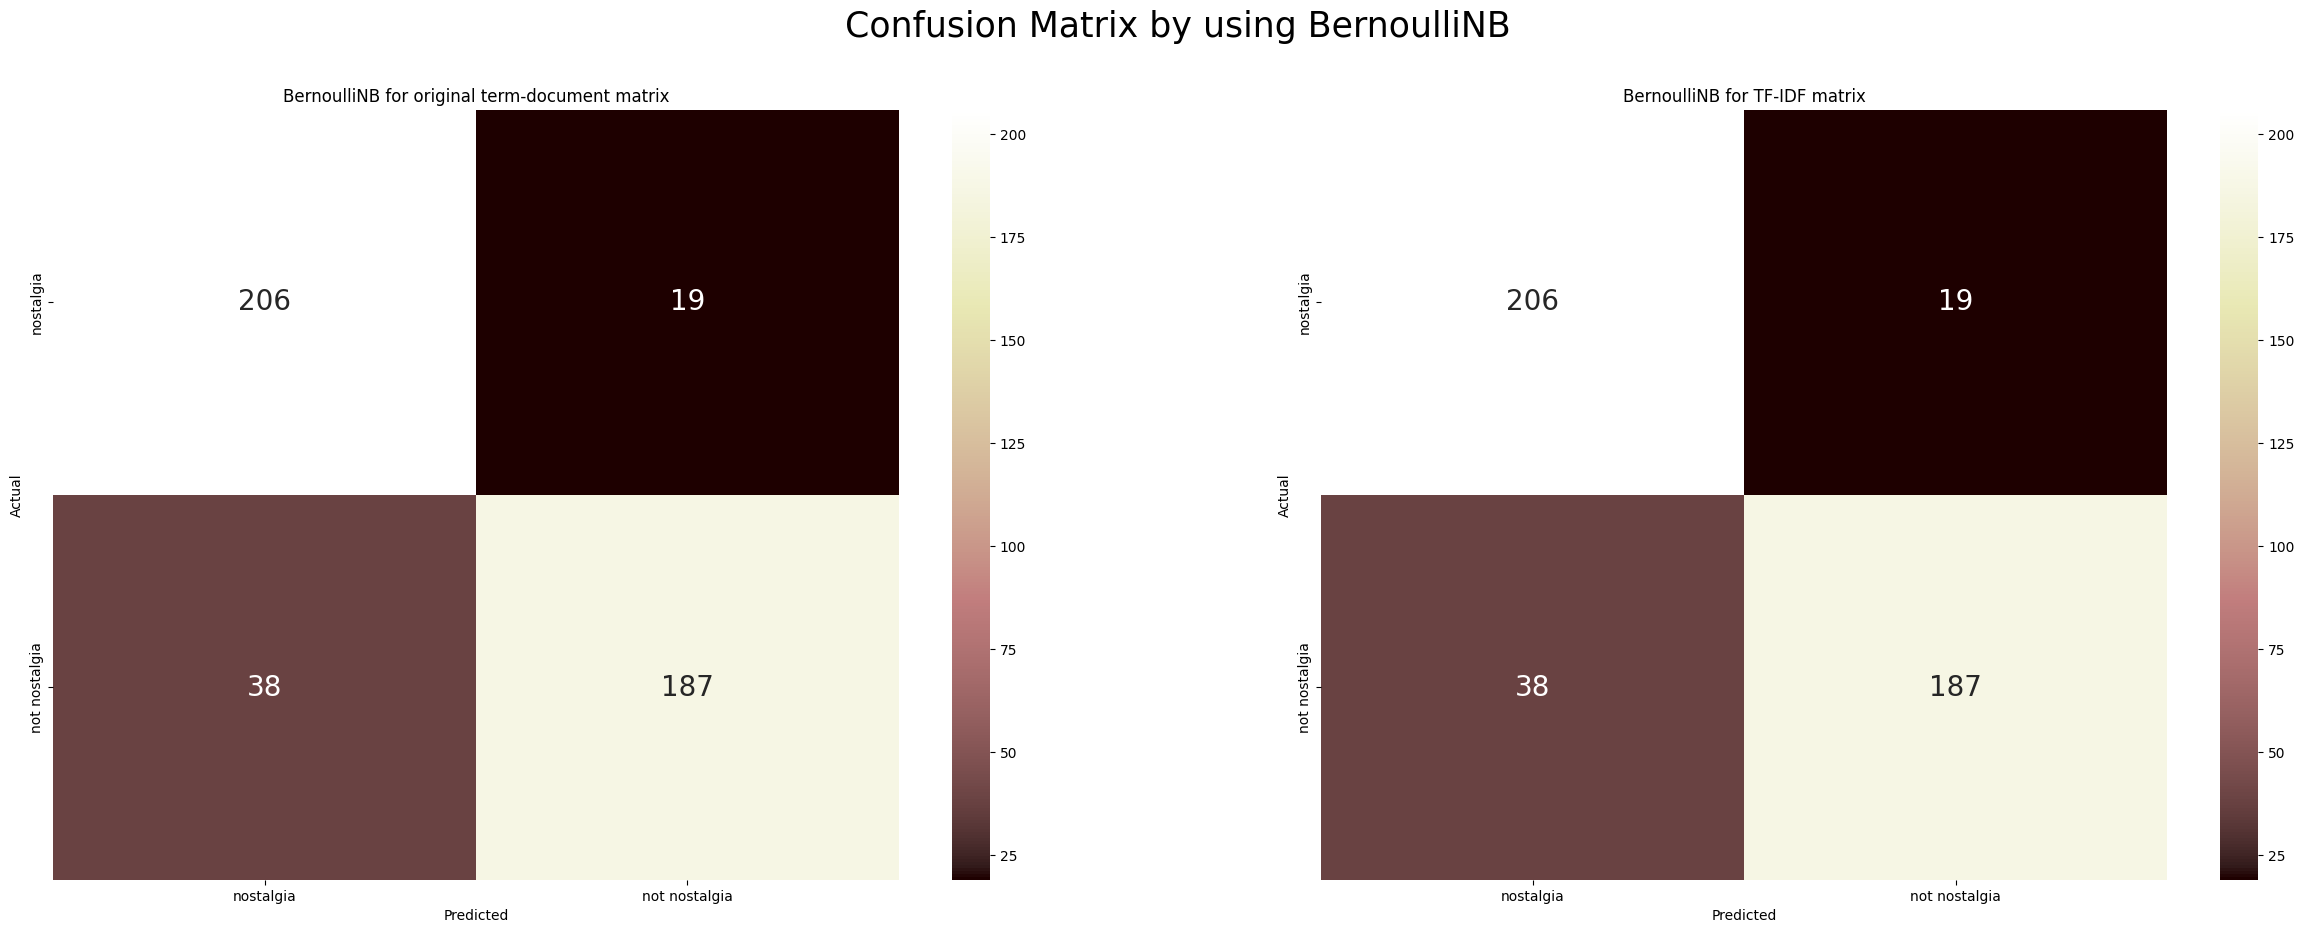

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Confusion Matrix by using BernoulliNB', fontsize=25)

tdm_conf_matrix = confusion_matrix(tdm_y_test, tdm_ber_y_pred)
tfidf_conf_matrix = confusion_matrix(tfidf_y_test, tfidf_ber_y_pred)

le = LabelEncoder()
le.fit(['not nostalgia', 'nostalgia'])  # Use LabelEncorder to know which sentiment is 0 or 1 

sns.heatmap(tdm_conf_matrix, annot=True, annot_kws={"size": 20}, fmt='d',
            xticklabels= le.classes_,  yticklabels = le.classes_,
            cmap="pink", ax=axes[0])
sns.heatmap(tfidf_conf_matrix, annot=True, annot_kws={"size": 20}, fmt='d',
            xticklabels= le.classes_,  yticklabels= le.classes_,
            cmap="pink", ax=axes[1])
axes[0].set_xlabel('Predicted'), axes[0].set_ylabel('Actual'), axes[0].set_title('BernoulliNB for original term-document matrix')
axes[1].set_xlabel('Predicted'), axes[1].set_ylabel('Actual'), axes[1].set_title('BernoulliNB for TF-IDF matrix')

### use **Multinomial naive Bayes** to implement classifier.

training on original term-document matrix.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_classifier = MultinomialNB()
nb_classifier.fit(tdm_X_train, tdm_y_train)

tdm_mul_y_pred = nb_classifier.predict(tdm_X_test)

print("Accuracy:", accuracy_score(tdm_y_test, tdm_mul_y_pred))
print("\nClassification Report:\n", classification_report(tdm_y_test, tdm_mul_y_pred, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7917    0.9289    0.8548       225
not nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



training on TF-IDF matrix.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_X_train, tfidf_y_train)

tfidf_mul_y_pred = nb_classifier.predict(tfidf_X_test)

print("Accuracy:", accuracy_score(tfidf_y_test, tfidf_mul_y_pred))
print("\nClassification Report:\n", classification_report(tfidf_y_test, tfidf_mul_y_pred, digits=4))

Accuracy: 0.8488888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7985    0.9333    0.8607       225
not nostalgia     0.9198    0.7644    0.8350       225

     accuracy                         0.8489       450
    macro avg     0.8591    0.8489    0.8478       450
 weighted avg     0.8591    0.8489    0.8478       450



Plot the `Confusion Matrix` to see the result.

(Text(0.5, 80.7222222222222, 'Predicted'),
 Text(1613.90404040404, 0.5, 'Actual'),
 Text(0.5, 1.0, 'MultinomialNB for TF-IDF matrix'))

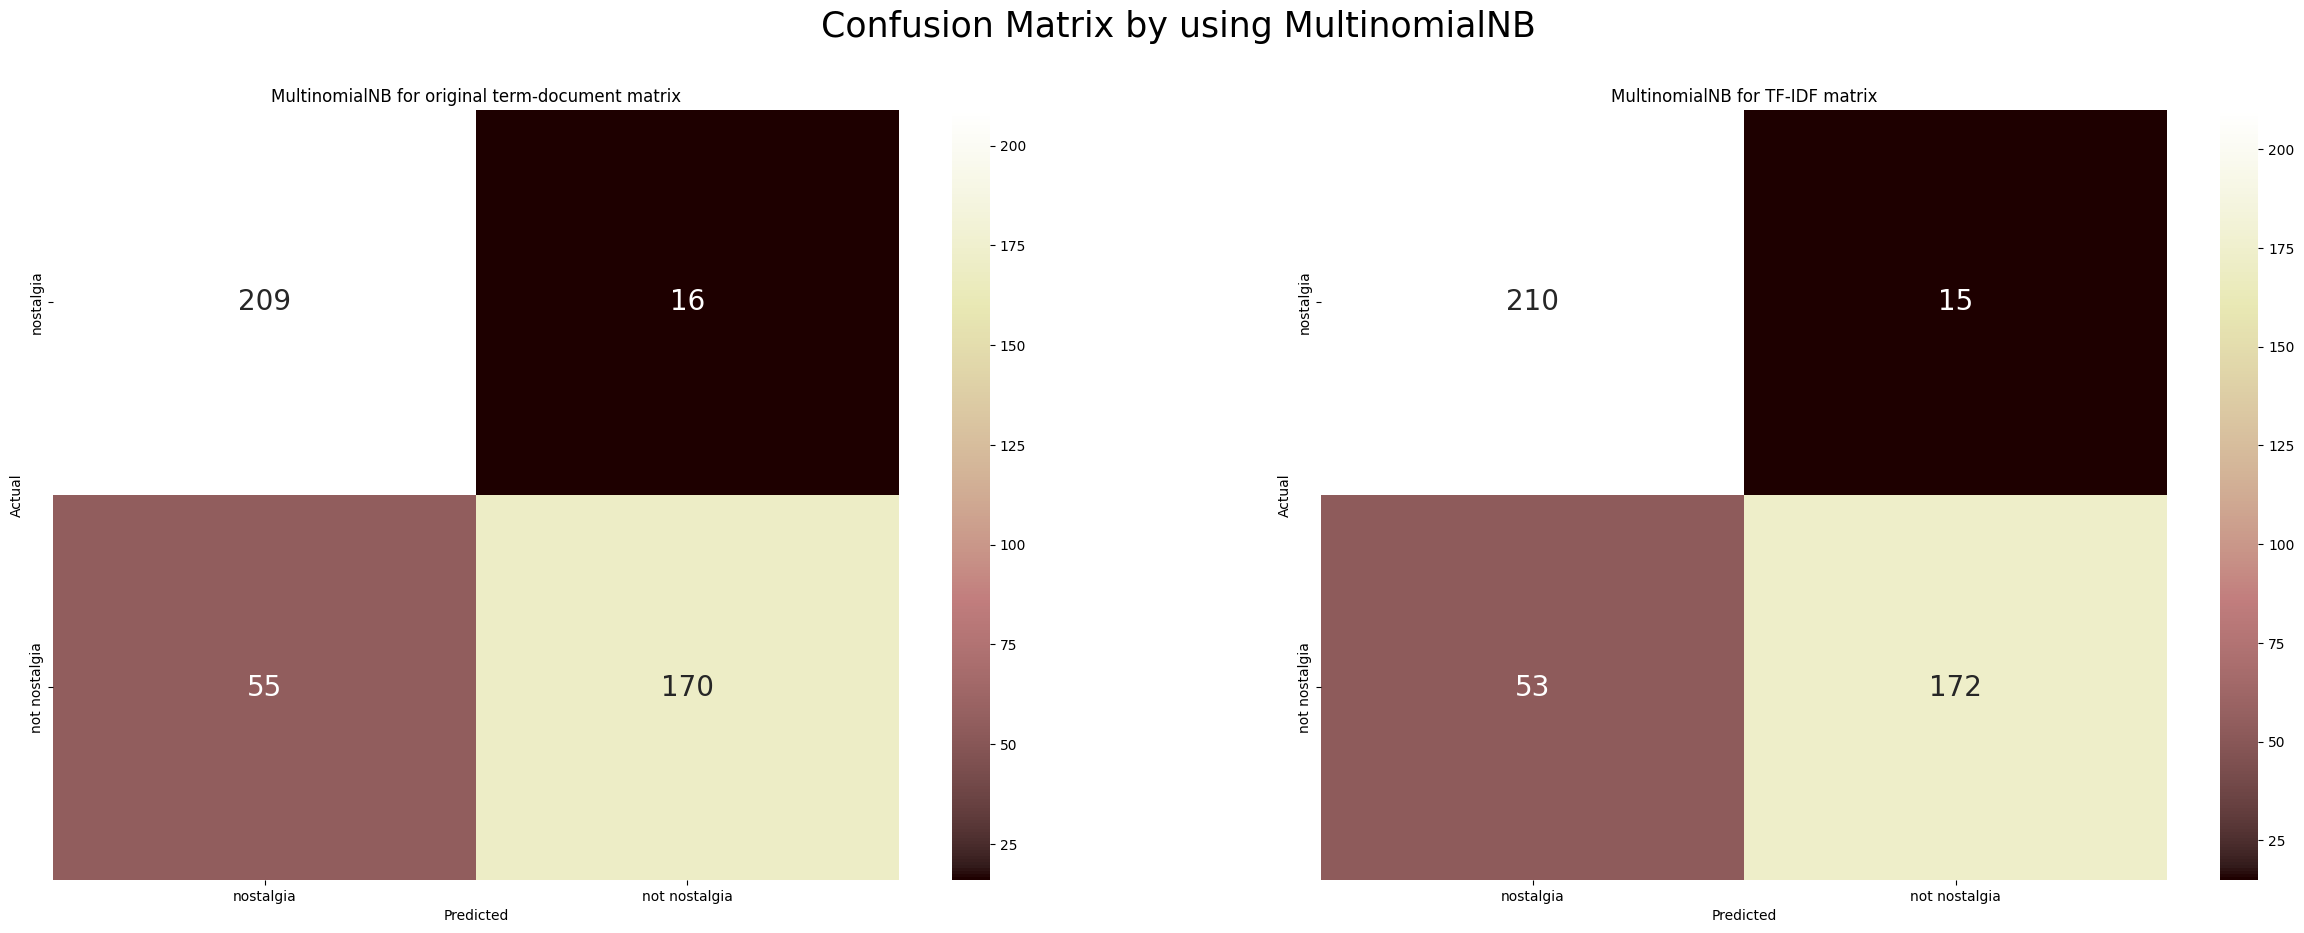

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Confusion Matrix by using MultinomialNB', fontsize=25)

tdm_conf_matrix = confusion_matrix(tdm_y_test, tdm_mul_y_pred)
tfidf_conf_matrix = confusion_matrix(tfidf_y_test, tfidf_mul_y_pred)

le = LabelEncoder()
le.fit(['not nostalgia', 'nostalgia'])  # Use LabelEncorder to know which sentiment is 0 or 1 

sns.heatmap(tdm_conf_matrix, annot=True, annot_kws={"size": 20}, fmt='d',
            xticklabels= le.classes_,  yticklabels = le.classes_,
            cmap="pink", ax=axes[0])
sns.heatmap(tfidf_conf_matrix, annot=True, annot_kws={"size": 20}, fmt='d',
            xticklabels= le.classes_,  yticklabels= le.classes_,
            cmap="pink", ax=axes[1])
axes[0].set_xlabel('Predicted'), axes[0].set_ylabel('Actual'), axes[0].set_title('MultinomialNB for original term-document matrix')
axes[1].set_xlabel('Predicted'), axes[1].set_ylabel('Actual'), axes[1].set_title('MultinomialNB for TF-IDF matrix')

### Compare

In this case, `BernoulliNB` performance is better than `MultinomialNB`. I guess it is because we only have 1500 datas and the dataframe is highly sparsity. And Bernoulli Naive Bayes is good at deal **binary data**.  

Whem we use `BernoulliNB` to training, we can see the accuracy is same no matter we use original term-document matrix or TF-IDF matrix. I think this is normal because `BernoulliNB` only care the words exist or not, it means it converts non-zero term frequencies to 1. So for `BernoulliNB`, these two dataframe will be the same.

But we can see if we use `MultinomialNB` to training, the TF-IDF matrix performance is better than original term-document matrix. This is because Multinomial Naive Bayes can better deal about the word frequency. 
 
I think if we have more data, using **Multinomial Naive Bayes** to train TF-IDF matrix will greatly improve the accuracy.